In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
class_result = pd.read_csv('/media/NGS/Nanopore_1/mNGS/20210309_clBC_9sample/centrifuge.out', sep='\t')

In [3]:
class_result = class_result.drop_duplicates('readID')

In [4]:
class_map = {i: ('unclassified' if j == 0 else 'classified') for i, j in zip(class_result['readID'], class_result['taxID'])}

In [5]:
class_result['taxRank'] = class_result['readID'].map(class_map)

In [10]:
class_result.head()

,readID,seqID,taxID,score,2ndBestScore,hitLength,queryLength,numMatches,taxRank
0,0c168d50-6262-4f03-987b-aa4fabdcd5e4,NC_000002.12,9606,2145,0,178,995,1,classified
1,3e688677-6486-4fbf-abc9-a228106e550d,NC_000020.11,9606,196,0,29,172,1,classified
2,d78d45e6-ca13-44e9-8c95-5e4e7e7d67e5,unclassified,0,0,0,0,252,1,unclassified
3,ba57b22a-3059-4a2d-bbe2-f626c08bb273,NZ_CP026803.1,623,144,0,27,37,1,classified
4,58ae1222-5f0a-4bbf-afd3-8001ecc0aa40,species,1280,961,0,46,133,1,classified


In [7]:
reads_stats = pd.read_csv("/media/NGS/Nanopore_1/mNGS/20210309_clBC_9sample/fastq.txt", sep='\t',
                          names=['read_id', 'length', 'avg_quality'])

In [8]:
reads_stats = reads_stats.merge(class_result[['readID', 'taxRank']], left_on='read_id', right_on='readID').drop(['readID'], axis=1)

In [9]:
reads_stats.head()

,read_id,length,avg_quality,taxRank
0,0c168d50-6262-4f03-987b-aa4fabdcd5e4,995,10.90,classified
1,849a3dd5-a416-4a7f-84a6-cbe026e61f8b,5509,14.05,classified
2,3e688677-6486-4fbf-abc9-a228106e550d,172,12.43,classified
3,d78d45e6-ca13-44e9-8c95-5e4e7e7d67e5,252,13.00,unclassified
4,bf9df42b-739b-4768-8fd3-a8825d707704,17400,15.76,classified


(0.0, 73866.15)

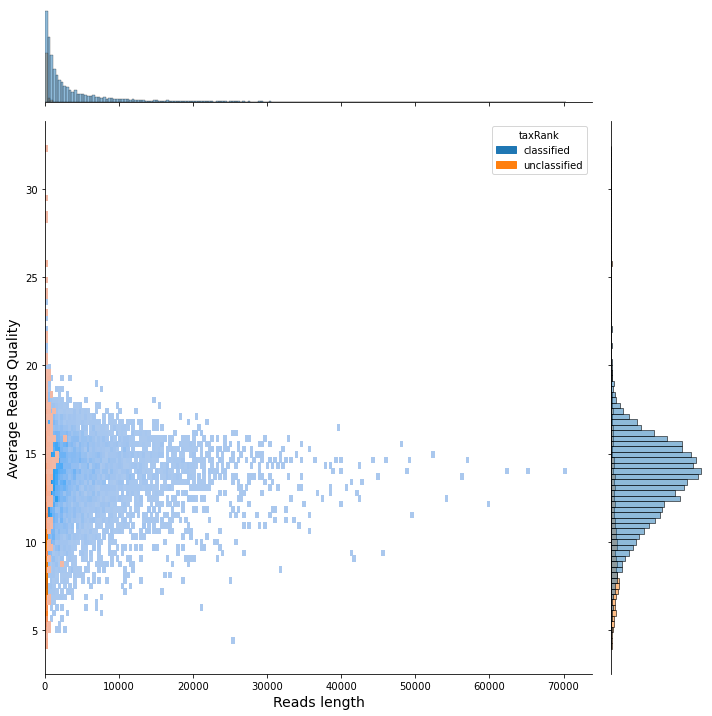

In [16]:
g = sns.jointplot(x='length', y='avg_quality', data=reads_stats.iloc[:10000], hue='taxRank', kind="hist", height=10)
g.ax_joint.set_xlabel('Reads length', fontsize=14)
g.ax_joint.set_ylabel('Average Reads Quality', fontsize=14)
g.ax_joint.set_xlim(0)

In [12]:
df = reads_stats.melt(id_vars=['taxRank', 'length', 'avg_quality'])

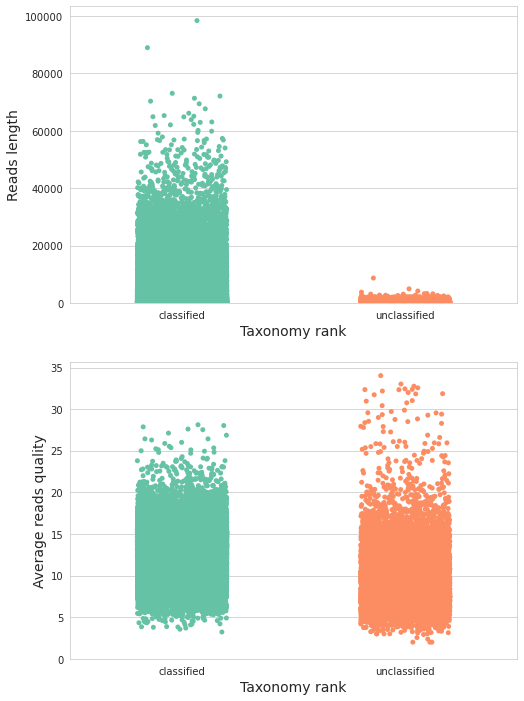

In [15]:
data = df.iloc[:100000]
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(2, 1, figsize=(8, 12))
    g1 = sns.stripplot(x='taxRank', y='length', data=data, ax=axes[0], palette="Set2", jitter=.2)
    g1.axes.set_ylim(0)
    g1.axes.set_xlabel('Taxonomy rank', fontsize=14)
    g1.axes.set_ylabel('Reads length', fontsize=14)
    
    g2 = sns.stripplot(x='taxRank', y='avg_quality', data=data, ax=axes[1], palette="Set2", jitter=.2)
    g2.axes.set_ylim(0)
    g2.axes.set_xlabel('Taxonomy rank', fontsize=14)
    g2.axes.set_ylabel('Average reads quality', fontsize=14)

In [ ]:
fig.savefig('/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/Lengths_vs_Quality_in_Identity.png', dpi=300)

In [23]:
reads_stats_2 = reads_stats.copy()
reads_stats_2['taxRank'] = reads_stats_2['taxRank'].map({'classified': 1, 'unclassified': 0})

In [24]:
reads_stats_2[['length', 'taxRank', 'avg_quality']].corr()

,length,taxRank,avg_quality
length,1.000000,0.166363,0.044356
taxRank,0.166363,1.000000,0.356485
avg_quality,0.044356,0.356485,1.000000
